## Import Library + Load Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('data_pelanggan_indosat.csv')

In [14]:
df.head()

,Nama,No_HP,Kota,Paket,Tgl_beli,Durasi_Bulan,Frekuensi_Topup,Kuota_Bulan_GB
0,"Balidin Dongoran, S.T.",85799239640,Surabaya,Freedom Combo,2024-10-08,9,5,16
1,Okto Jailani,81478074443,Jakarta,Freedom Combo,2025-03-15,4,1,7
2,R. Lantar Anggraini,81462526817,Medan,Freedom Combo,2024-07-22,12,2,20
3,Darimin Pradipta,81443713796,Semarang,Unlimited 2GB,2025-01-11,2,3,5
4,Kanda Napitupulu,85669303428,Surabaya,Yellow,2025-03-30,12,1,1


## Hitung Churn Rate Customer

In [16]:
# mengetahui churn rate
# Frekuensi_Topup ≤ 1 dalam 3+ bulan → dianggap churn
df['Churn'] = ((df['Frekuensi_Topup'] <= 1) & (df['Durasi_Bulan'] >=
3))
# hitung churn
churn_rate = df['Churn'].sum() / len(df) * 100
print(f'Hasil Persentase Churn Rate Customer: {churn_rate:.2f}%')

Hasil Persentase Churn Rate Customer: 22.50%


## Tampilkan Dalam Grafik

/tmp/ipykernel_552506/2240223363.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [churn_counts[0], churn_counts[1]]


(np.float64(-1.0999999318335567),
 np.float64(1.0999999967539789),
 np.float64(-1.0999998974046947),
 np.float64(1.0999999790110455))

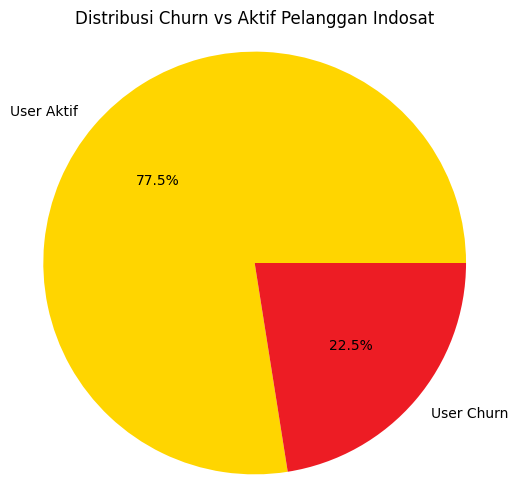

In [20]:
# Buat pie chart churn vs aktif
churn_counts = df['Churn'].value_counts()
labels = ['User Aktif', 'User Churn']
sizes = [churn_counts[0], churn_counts[1]]
colors = ['#FFD500', '#ED1C24']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
colors=colors)
plt.title('Distribusi Churn vs Aktif Pelanggan Indosat')
plt.axis('equal')